In [ ]:
!pip install voxelmorph                                                                                                                           

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_images_brain.zip to train_images_brain.zip


In [ ]:
import os
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['train_images.zip']), 'r')
data.extractall()

KeyError: ignored

In [ ]:
data.printdir()

File Name                                             Modified             Size
train_images/                                  2023-04-04 12:36:50            0
train_images/image180.jpg                      2023-04-04 12:23:16         7375
train_images/image495.jpg                      2023-04-04 12:25:54         7388
train_images/image515.jpg                      2023-04-04 12:26:04         7516
train_images/image19.jpg                       2023-04-04 12:21:56         7393
train_images/image25.jpg                       2023-04-04 12:21:58         7230
train_images/image2.jpg                        2023-04-04 12:21:48         7162
train_images/image535.jpg                      2023-04-04 12:26:14         7218
train_images/image31.jpg                       2023-04-04 12:22:02         7299
train_images/image39.jpg                       2023-04-04 12:22:06         7402
train_images/image43.jpg                       2023-04-04 12:22:08         7335
train_images/image45.jpg                

(976, 160, 256)
Training Data Shape:  (683, 160, 256)
Validation Data Shape:  (194, 160, 256)
Test Data Shape:  (97, 160, 256)


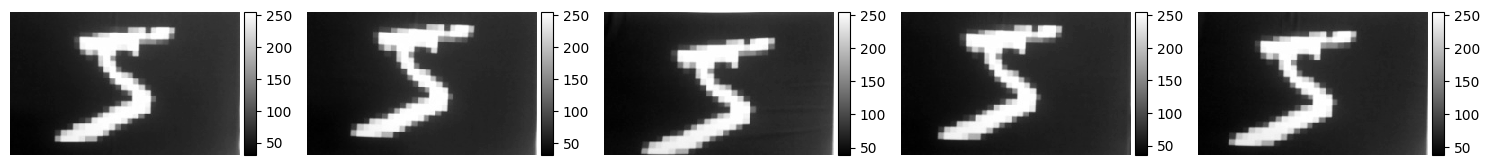

training maximum value 1.0


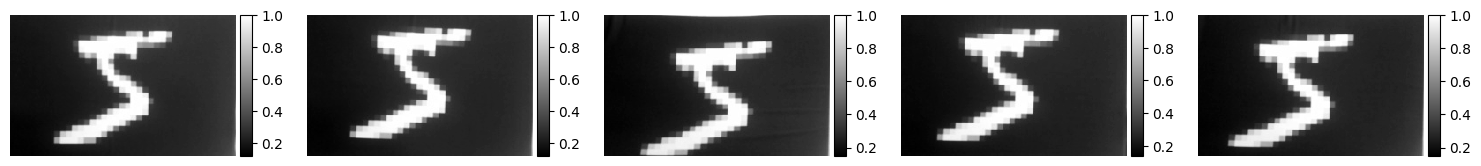

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessTruncatedNormalV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _Eager

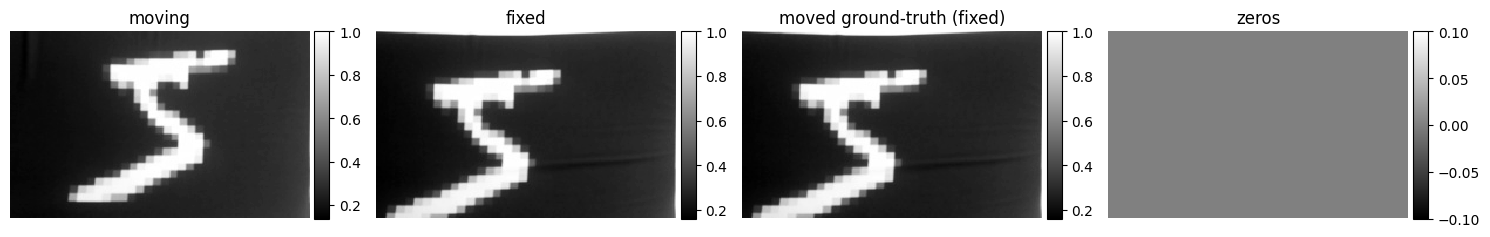

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in dev

<ipython-input-9-d5a3952792e5>:186: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = vxm_model.fit_generator(train_generator, epochs=nb_epochs, steps_per_epoch=steps_per_epoch, verbose=2)


Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localh

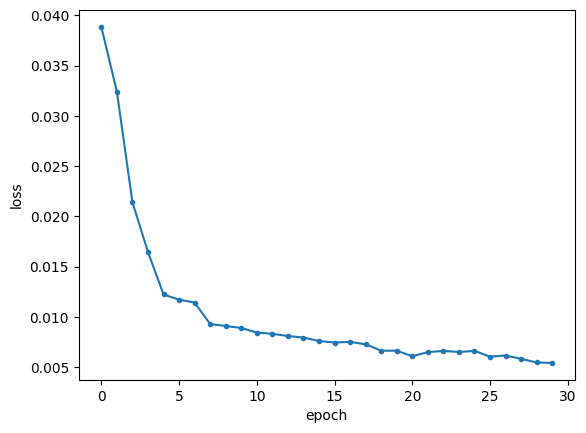

In [ ]:
# imports
import os, sys
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
# third party imports
import numpy as np
import tensorflow as tf
assert tf.__version__.startswith('2.')
import cv2

# local imports
import voxelmorph as vxm
import neurite as ne

tf.config.set_soft_device_placement(True)
tf.debugging.set_log_device_placement(True)

def load_images_from_folder(folder):
    images = []
    num_images = 0
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
        if img is not None:
            num_images+=1
            images.append(img)
    images = np.stack(images,axis=0)
    return images, num_images

images, num_images = load_images_from_folder("train_images")

np.random.shuffle(images)

print(images.shape)
x_train = images[:(int(0.7*num_images)),:,:]
x_val = images[(int(0.7*num_images)+1):(int(0.9*num_images)),:,:]
x_test = images[(int(0.9*num_images+1)):,:,:]


#image = np.random.randint(256, size=(1440, 2560, 3), dtype=int)
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# gray = np.random.randint(256, size=(1440, 2560), dtype=int)
# x_train = np.zeros((144,256))
# x_train = cv2.resize(gray, (144,256), interpolation=cv2.INTER_LINEAR)
# x_train.unsqueeze()

print("Training Data Shape: ", np.shape(x_train))
print("Validation Data Shape: ", np.shape(x_val))
print("Test Data Shape: ", np.shape(x_test))

nb_vis = 5
# choose nb_vis sample indexes
idx = np.random.choice(x_train.shape[0], nb_vis, replace=False)
example_imgs = [f for f in x_train[idx, ...]]

# plot
ne.plot.slices(example_imgs, cmaps=['gray'], do_colorbars=True);

# normalize between [0, 1]
x_train = (x_train.astype('float')-np.ones(x_train.shape)*np.min(x_train))/np.max(x_train.astype('float')-np.ones(x_train.shape)*np.min(x_train))
x_val = (x_val.astype('float')-np.ones(x_val.shape)*np.min(x_val))/np.max(x_val.astype('float')-np.ones(x_val.shape)*np.min(x_val))
x_test = (x_test.astype('float')-np.ones(x_test.shape)*np.min(x_test))/np.max(x_test.astype('float')-np.ones(x_test.shape)*np.min(x_test))

# verify
print('training maximum value', x_train.max())

# re-visualize
example_imgs = [f for f in x_train[idx, ...]]
#plot
ne.plot.slices(example_imgs, cmaps=['gray'], do_colorbars=True);


# Images (256 x 160) (16*2^4 x 9*2^4)
# After padding (256 x 160)
# Need to update to make input size a multiple of 2^N
#pad_amount = ((0, 0), (8,8), (0,0))

# fix data
#x_train = np.pad(x_train, pad_amount, 'constant')

# configure unet input shape (concatenation of moving and fixed images)
ndim = 2
unet_input_features = 2
inshape = (*x_train.shape[1:], unet_input_features)

# configure unet features 
nb_features = [
    [32, 32, 32, 32],   # encoder features
    [32, 32, 32, 32, 32, 16]  # decoder features
]

# build model
unet = vxm.networks.Unet(inshape=inshape, nb_features=nb_features)

print('input shape: ', unet.input.shape)
print('output shape:', unet.output.shape)

# transform the results into a flow field.
disp_tensor = tf.keras.layers.Conv2D(ndim, kernel_size=3, padding='same', name='disp')(unet.output)

# check tensor shape
print('displacement tensor:', disp_tensor.shape)

# using keras, we can easily form new models via tensor pointers
def_model = tf.keras.models.Model(unet.inputs, disp_tensor)

# build transformer layer
spatial_transformer = vxm.layers.SpatialTransformer(name='transformer')

# extract the first frame (i.e. the "moving" image) from unet input tensor
moving_image = tf.expand_dims(unet.input[..., 0], axis=-1)

# warp the moving image with the transformer
moved_image_tensor = spatial_transformer([moving_image, disp_tensor])
outputs = [moved_image_tensor, disp_tensor]
vxm_model = tf.keras.models.Model(inputs=unet.inputs, outputs=outputs)

# build model using VxmDense
inshape = x_train.shape[1:]
vxm_model = vxm.networks.VxmDense(inshape, nb_features, int_steps=0)

print('input shape: ', ', '.join([str(t.shape) for t in vxm_model.inputs]))
print('output shape:', ', '.join([str(t.shape) for t in vxm_model.outputs]))

# voxelmorph has a variety of custom loss classes
losses = [vxm.losses.MSE().loss, vxm.losses.Grad('l2').loss]

# usually, we have to balance the two losses by a hyper-parameter
lambda_param = 0.05
loss_weights = [1, lambda_param]

vxm_model.compile(optimizer='Adam', loss=losses, loss_weights=loss_weights)


def vxm_data_generator(x_data, batch_size=32):
    """
    Generator that takes in data of size [N, H, W], and yields data for
    our custom vxm model. Note that we need to provide numpy data for each
    input, and each output.

    inputs:  moving [bs, H, W, 3], fixed image [bs, H, W, 3]
    outputs: moved image [bs, H, W, 3], zero-gradient [bs, H, W, 2]
    """

    # preliminary sizing
    vol_shape = x_data.shape[1:] # extract data shape
    ndims = len(vol_shape)


    
    # prepare a zero array the size of the deformation
    # we'll explain this below
    zero_phi = np.zeros([batch_size, *vol_shape, ndims])
    
    while True:
        # prepare inputs:
        # images need to be of the size [batch_size, H, W, 1]
        idx1 = np.random.randint(0, x_data.shape[0], size=batch_size)
        moving_images = x_data[idx1, ..., np.newaxis]
        idx2 = np.random.randint(0, x_data.shape[0], size=batch_size)
        fixed_images = x_data[idx2, ..., np.newaxis]
        inputs = [moving_images, fixed_images]
          
        # prepare outputs (the 'true' moved image):
        # of course, we don't have this, but we know we want to compare 
        # the resulting moved image with the fixed image. 
        # we also wish to penalize the deformation field. 
        outputs = [fixed_images, zero_phi]
          
        yield (inputs, outputs)

# let's test it

train_generator = vxm_data_generator(x_train)
in_sample, out_sample = next(train_generator)
print("Shape in_sample:", np.shape(in_sample))
print("Shape out_sample 1:", np.shape(out_sample[0]))
print("Shape out_sample 2:", np.shape(out_sample[1]))

# visualize
images = [img[0, :, :, 0] for img in in_sample + out_sample] 
titles = ['moving', 'fixed', 'moved ground-truth (fixed)', 'zeros']
ne.plot.slices(images, titles=titles, cmaps=['gray'], do_colorbars=True)

nb_epochs = 30
steps_per_epoch = 15
hist = vxm_model.fit_generator(train_generator, epochs=nb_epochs, steps_per_epoch=steps_per_epoch, verbose=2)

import matplotlib.pyplot as plt

def plot_history(hist, loss_name='loss'):
    # Simple function to plot training history.
    plt.figure()
    plt.plot(hist.epoch, hist.history[loss_name], '.-')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()

plot_history(hist)

In [ ]:
for i in range(30):
  val_generator = vxm_data_generator(x_val, batch_size = 1)
  val_input, _ = next(val_generator)
  val_pred = vxm_model.predict(val_input)
  images = [img[0, :, :, 0] for img in val_input + val_pred] 
  titles = ['moving', 'fixed', 'moved', 'flow']
  ne.plot.slices(images, titles=titles, cmaps=['gray'], do_colorbars=True);
#ne.plot.flow([val_pred[1].squeeze()], width=5);

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving brain_train_final.zip to brain_train_final (1).zip


In [ ]:
import os
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['brain_train_final.zip']), 'r')
data.extractall()

(971, 160, 256)
Training Data Shape:  (679, 160, 256)
Validation Data Shape:  (193, 160, 256)
Test Data Shape:  (97, 160, 256)


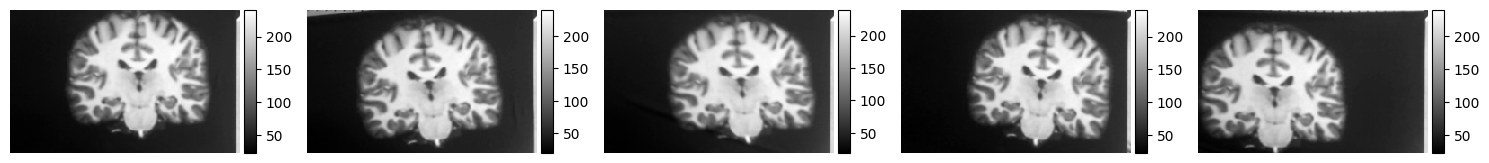

training maximum value 0.9725490196078431


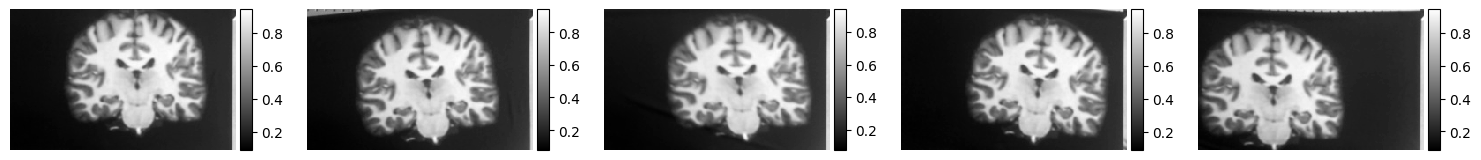

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessTruncatedNormalV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _Eager

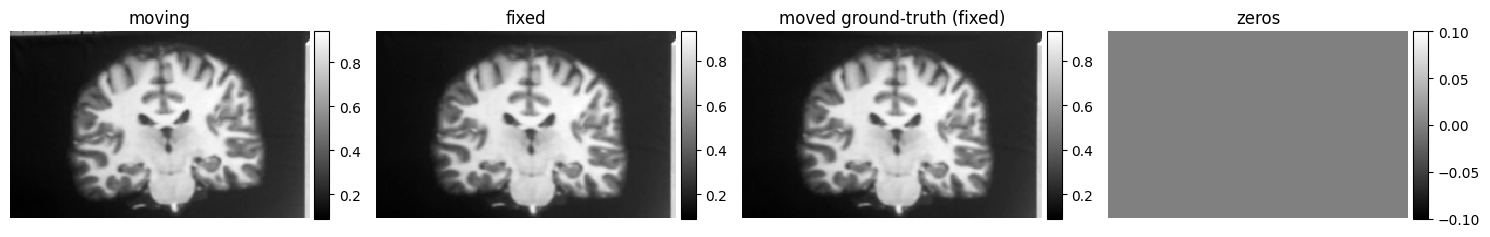

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in dev

<ipython-input-74-0e80be1cc413>:190: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = vxm_model.fit_generator(train_generator, epochs=nb_epochs, steps_per_epoch=steps_per_epoch, verbose=2)


Streaming output truncated to the last 5000 lines.
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_168515 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_168515 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_168515 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_train_function_168515 in device /job:localhost/replica:0/task

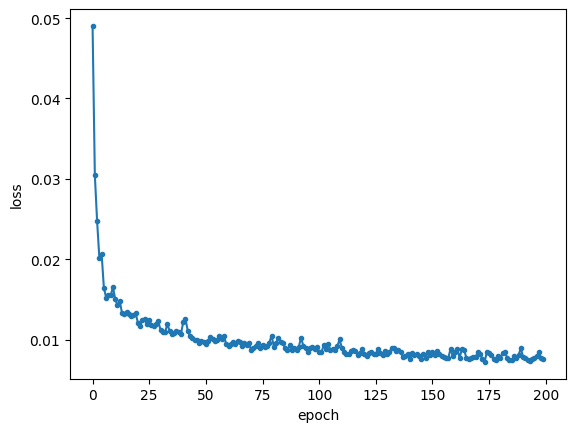

In [ ]:
# imports
import os, sys
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
# third party imports
import numpy as np
import tensorflow as tf
assert tf.__version__.startswith('2.')
import cv2

# local imports
import voxelmorph as vxm
import neurite as ne

tf.config.set_soft_device_placement(True)
tf.debugging.set_log_device_placement(True)

def load_images_from_folder(folder):
    images = []
    num_images = 0
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
        if img is not None:
            num_images+=1
            images.append(img)
    images = np.stack(images,axis=0)
    return images, num_images

images, num_images = load_images_from_folder("brain_train_final")

np.random.shuffle(images)

print(images.shape)
x_train = images[:(int(0.7*num_images)),:,:]
x_val = images[(int(0.7*num_images)+1):(int(0.9*num_images)),:,:]
x_test = images[(int(0.9*num_images+1)):,:,:]


#image = np.random.randint(256, size=(1440, 2560, 3), dtype=int)
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# gray = np.random.randint(256, size=(1440, 2560), dtype=int)
# x_train = np.zeros((144,256))
# x_train = cv2.resize(gray, (144,256), interpolation=cv2.INTER_LINEAR)
# x_train.unsqueeze()

print("Training Data Shape: ", np.shape(x_train))
print("Validation Data Shape: ", np.shape(x_val))
print("Test Data Shape: ", np.shape(x_test))

nb_vis = 5
# choose nb_vis sample indexes
idx = np.random.choice(x_train.shape[0], nb_vis, replace=False)
example_imgs = [f for f in x_train[idx, ...]]

# plot
ne.plot.slices(example_imgs, cmaps=['gray'], do_colorbars=True);

# normalize between [0, 1]

x_train = x_train.astype('float')/255
x_val = x_val.astype('float')/255
x_test = x_test.astype('float')/255

# x_train = (x_train.astype('float')-np.ones(x_train.shape)*np.min(x_train))/np.max(x_train.astype('float')-np.ones(x_train.shape)*np.min(x_train))
# x_val = (x_val.astype('float')-np.ones(x_val.shape)*np.min(x_val))/np.max(x_val.astype('float')-np.ones(x_val.shape)*np.min(x_val))
# x_test = (x_test.astype('float')-np.ones(x_test.shape)*np.min(x_test))/np.max(x_test.astype('float')-np.ones(x_test.shape)*np.min(x_test))
# verify
print('training maximum value', x_train.max())

# re-visualize
example_imgs = [f for f in x_train[idx, ...]]
#plot
ne.plot.slices(example_imgs, cmaps=['gray'], do_colorbars=True);


# Images (256 x 160) (16*2^4 x 9*2^4)
# After padding (256 x 160)
# Need to update to make input size a multiple of 2^N
#pad_amount = ((0, 0), (8,8), (0,0))

# fix data
#x_train = np.pad(x_train, pad_amount, 'constant')

# configure unet input shape (concatenation of moving and fixed images)
ndim = 2
unet_input_features = 2
inshape = (*x_train.shape[1:], unet_input_features)

# configure unet features 
nb_features = [
    [32, 32, 32, 32],   # encoder features
    [32, 32, 32, 32, 32, 16]  # decoder features
]

# build model
unet = vxm.networks.Unet(inshape=inshape, nb_features=nb_features)

print('input shape: ', unet.input.shape)
print('output shape:', unet.output.shape)

# transform the results into a flow field.
disp_tensor = tf.keras.layers.Conv2D(ndim, kernel_size=3, padding='same', name='disp')(unet.output)

# check tensor shape
print('displacement tensor:', disp_tensor.shape)

# using keras, we can easily form new models via tensor pointers
def_model = tf.keras.models.Model(unet.inputs, disp_tensor)

# build transformer layer
spatial_transformer = vxm.layers.SpatialTransformer(name='transformer')

# extract the first frame (i.e. the "moving" image) from unet input tensor
moving_image = tf.expand_dims(unet.input[..., 0], axis=-1)

# warp the moving image with the transformer
moved_image_tensor = spatial_transformer([moving_image, disp_tensor])
outputs = [moved_image_tensor, disp_tensor]
vxm_model = tf.keras.models.Model(inputs=unet.inputs, outputs=outputs)

# build model using VxmDense
inshape = x_train.shape[1:]
vxm_model = vxm.networks.VxmDense(inshape, nb_features, int_steps=0)

print('input shape: ', ', '.join([str(t.shape) for t in vxm_model.inputs]))
print('output shape:', ', '.join([str(t.shape) for t in vxm_model.outputs]))

# voxelmorph has a variety of custom loss classes
losses = [vxm.losses.MSE().loss, vxm.losses.Grad('l2').loss]

# usually, we have to balance the two losses by a hyper-parameter
lambda_param = 0.01
loss_weights = [1, lambda_param]

vxm_model.compile(optimizer='Adam', loss=losses, loss_weights=loss_weights)


def vxm_data_generator(x_data, batch_size=32):
    """
    Generator that takes in data of size [N, H, W], and yields data for
    our custom vxm model. Note that we need to provide numpy data for each
    input, and each output.

    inputs:  moving [bs, H, W, 3], fixed image [bs, H, W, 3]
    outputs: moved image [bs, H, W, 3], zero-gradient [bs, H, W, 2]
    """

    # preliminary sizing
    vol_shape = x_data.shape[1:] # extract data shape
    ndims = len(vol_shape)


    
    # prepare a zero array the size of the deformation
    # we'll explain this below
    zero_phi = np.zeros([batch_size, *vol_shape, ndims])
    
    while True:
        # prepare inputs:
        # images need to be of the size [batch_size, H, W, 1]
        idx1 = np.random.randint(0, x_data.shape[0], size=batch_size)
        moving_images = x_data[idx1, ..., np.newaxis]
        idx2 = np.random.randint(0, x_data.shape[0], size=batch_size)
        fixed_images = x_data[idx2, ..., np.newaxis]
        inputs = [moving_images, fixed_images]
          
        # prepare outputs (the 'true' moved image):
        # of course, we don't have this, but we know we want to compare 
        # the resulting moved image with the fixed image. 
        # we also wish to penalize the deformation field. 
        outputs = [fixed_images, zero_phi]
          
        yield (inputs, outputs)

# let's test it

train_generator = vxm_data_generator(x_train, batch_size=8)
in_sample, out_sample = next(train_generator)
print("Shape in_sample:", np.shape(in_sample))
print("Shape out_sample 1:", np.shape(out_sample[0]))
print("Shape out_sample 2:", np.shape(out_sample[1]))

# visualize
images = [img[0, :, :, 0] for img in in_sample + out_sample] 
titles = ['moving', 'fixed', 'moved ground-truth (fixed)', 'zeros']
ne.plot.slices(images, titles=titles, cmaps=['gray'], do_colorbars=True)

nb_epochs = 200
steps_per_epoch = 30
hist = vxm_model.fit_generator(train_generator, epochs=nb_epochs, steps_per_epoch=steps_per_epoch, verbose=2)

vxm_model.save_weights("brain_mri_weights.h5")

import matplotlib.pyplot as plt

def plot_history(hist, loss_name='loss'):
    # Simple function to plot training history.
    plt.figure()
    plt.plot(hist.epoch, hist.history[loss_name], '.-')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()

plot_history(hist)

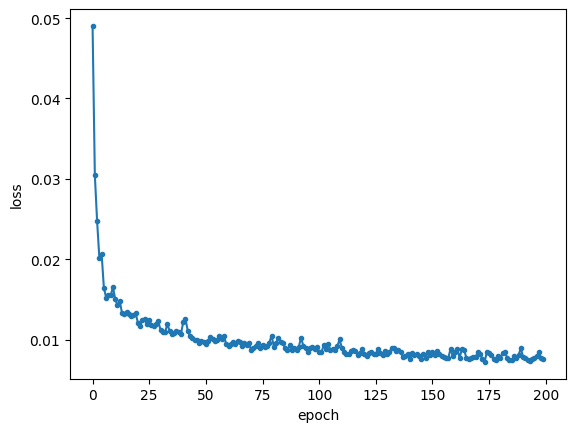

In [ ]:
plot_history(hist)

In [ ]:
# unet
vol_shape = (160, 256)
nb_features = [
    [32, 32, 32, 32],   # encoder features
    [32, 32, 32, 32, 32, 16]  # decoder features
]

vxm_model2 = vxm.networks.VxmDense(vol_shape, nb_features, int_steps=0)

# losses and loss weights
losses = ['mse', vxm.losses.Grad('l2').loss]
loss_weights = [1, 0.01]

vxm_model2.compile(optimizer='Adam', loss=losses, loss_weights=loss_weights)

vxm_model2.load_weights("brain_mri_weights.h5")

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessTruncatedNormalV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executi

In [ ]:
from google.colab.patches import cv2_imshow

for i in range(30):
  val_generator = vxm_data_generator(x_val, batch_size = 1)
  val_input, _ = next(val_generator)
  val_pred = vxm_model.predict(val_input)
  images = [img[0, :, :, 0] for img in val_input + val_pred] 
  titles = ['moving', 'fixed', 'moved', 'flow']
  ne.plot.slices(images, titles=titles, cmaps=['gray'], do_colorbars=True);

  val_pred = vxm_model2.predict(val_input)
  images = [img[0, :, :, 0] for img in val_input + val_pred] 
  titles = ['moving', 'fixed', 'moved', 'flow']
  ne.plot.slices(images, titles=titles, cmaps=['gray'], do_colorbars=True);

  ne.plot.slices(val_pred[1].squeeze()[:,:,0], titles=['flow'], cmaps=['gray'], do_colorbars=True);
  ne.plot.slices(val_pred[1].squeeze()[:,:,1], titles=['flow'], cmaps=['gray'], do_colorbars=True);


#ne.plot.flow([val_pred[1].squeeze()], width=5);

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(val_pred[1])
print(np.shape(val_pred[1]))

[[[[ 9.37403202e-01  8.20535541e-01]
   [ 1.26646698e+00  1.12257564e+00]
   [ 1.33287883e+00  1.32585597e+00]
   ...
   [ 2.33992696e+00  3.16967249e-01]
   [ 1.57312489e+00  1.97929725e-01]
   [ 8.48142982e-01  9.75677520e-02]]

  [[ 1.13728309e+00  1.02024305e+00]
   [ 1.44643056e+00  1.22141349e+00]
   [ 1.49815869e+00  1.35184824e+00]
   ...
   [ 2.06457567e+00  2.42900297e-01]
   [ 1.35338986e+00  1.16882786e-01]
   [ 7.69258380e-01  2.83131674e-02]]

  [[ 1.21040869e+00  1.11000431e+00]
   [ 1.50741994e+00  1.27796817e+00]
   [ 1.50588489e+00  1.34121823e+00]
   ...
   [ 1.52127814e+00  5.47433347e-02]
   [ 9.59048510e-01 -4.52443473e-02]
   [ 6.07730627e-01 -7.27649033e-02]]

  ...

  [[-1.65353835e+00  5.67632103e+00]
   [-2.04934263e+00  5.74407768e+00]
   [-2.16647363e+00  5.71490860e+00]
   ...
   [-9.15129781e-02  4.11856204e-01]
   [-1.38235688e-01  3.14726055e-01]
   [-2.91594267e-02  5.62809594e-02]]

  [[-1.56355166e+00  4.85251522e+00]
   [-2.06113672e+00  5.09859324e

In [ ]:
uploaded = files.upload()

Saving moving_image.jpg to moving_image.jpg


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessTruncatedNormalV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executi

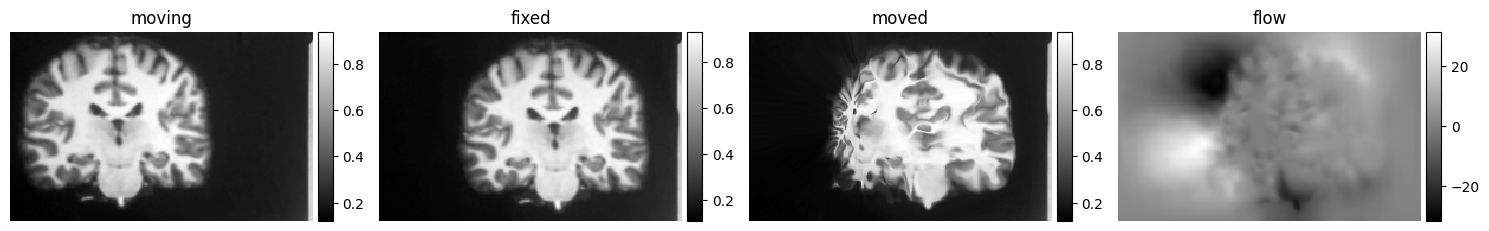

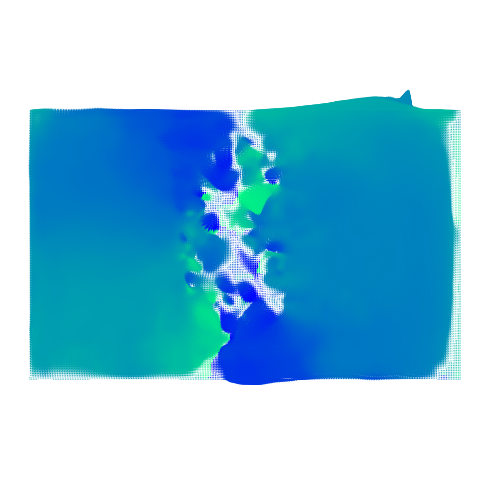

In [ ]:
fixed_image = cv2.imread("fixed_image.jpg",cv2.IMREAD_GRAYSCALE)
moving_image = cv2.imread("moving_image.jpg",cv2.IMREAD_GRAYSCALE)

# unet
vol_shape = (160, 256)
nb_features = [
    [32, 32, 32, 32],   # encoder features
    [32, 32, 32, 32, 32, 16]  # decoder features
]

vxm_model2 = vxm.networks.VxmDense(vol_shape, nb_features, int_steps=0)

# losses and loss weights
losses = ['mse', vxm.losses.Grad('l2').loss]
loss_weights = [1, 0.01]

vxm_model2.compile(optimizer='Adam', loss=losses, loss_weights=loss_weights)

vxm_model2.load_weights("brain_mri_weights.h5")
moving = np.expand_dims(moving_image.astype('float')/255,axis=0)
moving = np.expand_dims(moving,axis=3)

fixed = np.expand_dims(fixed_image.astype('float')/255,axis=0)
fixed = np.expand_dims(fixed,axis=3)

val_input = [moving,fixed]
val_pred = vxm_model.predict(val_input)
moved_image = np.squeeze(val_pred[0])

cv2.imwrite("moved_image.jpg",moved_image)

deform_field = np.squeeze(val_pred[1],axis=0)

val_pred = vxm_model2.predict(val_input)
images = [img[0, :, :, 0] for img in val_input + val_pred] 
titles = ['moving', 'fixed', 'moved', 'flow']
ne.plot.slices(images, titles=titles, cmaps=['gray'], do_colorbars=True);


In [ ]:
print(val_input)

[array([[[[ 37],
         [ 36],
         [ 36],
         ...,
         [ 84],
         [ 90],
         [ 94]],

        [[ 37],
         [ 37],
         [ 37],
         ...,
         [ 72],
         [ 75],
         [ 80]],

        [[ 37],
         [ 37],
         [ 38],
         ...,
         [ 66],
         [ 62],
         [ 64]],

        ...,

        [[ 32],
         [ 32],
         [ 32],
         ...,
         [203],
         [206],
         [207]],

        [[ 32],
         [ 32],
         [ 32],
         ...,
         [203],
         [206],
         [207]],

        [[ 32],
         [ 32],
         [ 32],
         ...,
         [203],
         [206],
         [207]]]], dtype=uint8), array([[[[ 37],
         [ 37],
         [ 37],
         ...,
         [ 87],
         [ 89],
         [ 97]],

        [[ 37],
         [ 37],
         [ 37],
         ...,
         [ 73],
         [ 73],
         [ 79]],

        [[ 37],
         [ 37],
         [ 37],
         ...,
         [ 6

In [ ]:
print(val_pred)

[array([[[[ 32.      ],
         [ 32.      ],
         [ 32.      ],
         ...,
         [ 37.784008],
         [114.34089 ],
         [ 48.62217 ]],

        [[ 32.      ],
         [ 32.      ],
         [ 32.      ],
         ...,
         [ 46.36992 ],
         [ 49.      ],
         [ 53.031807]],

        [[ 32.      ],
         [ 32.      ],
         [ 32.      ],
         ...,
         [ 47.      ],
         [ 48.      ],
         [ 94.      ]],

        ...,

        [[155.07341 ],
         [114.260216],
         [132.15303 ],
         ...,
         [ 94.      ],
         [201.56758 ],
         [ 49.543716]],

        [[196.65326 ],
         [ 43.88096 ],
         [ 42.792603],
         ...,
         [ 94.      ],
         [ 94.      ],
         [210.969   ]],

        [[217.90152 ],
         [201.83585 ],
         [219.77151 ],
         ...,
         [ 94.      ],
         [ 94.      ],
         [208.      ]]]], dtype=float32), array([[[[ 182.45923   , -109.29806   ],
   